In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [41]:
# perform k_means in 1 dimensional case
def k_means(points, means):
    min_distance = float('inf')
    distance = 0
    min_index = 0
    groups = {}
    # instantiate the groups dictionary
    for i in range(0, len(means)):
        groups[means[i]] = []
    for i in range(0, len(points)):
        for j in range(0, len(means)):
            distance = np.abs(points[i] - means[j])
            if distance < min_distance:
                min_distance = distance
                min_index = j
        distance = 0
        min_distance = float('inf')
        groups[means[min_index]].append(points[i])
    return groups

# redefine the mean based on the points assigned to the mean group
def re_group(groups):
    new_means = []
    s = 0
    n = 0
    # loop through means in the dictionary
    for mean in groups:
        n = len(groups[mean])
        # check if any points have been listed as being grouped around
        # the given mean
        if n > 0:
            # calculate the new average
            for i in range(0, len(groups[mean])):
                s += groups[mean][i]
            # save the new mean in an array that will be returned to the caller
            new_means.append(s/n)
            s = 0
            n = 0
        # no points are grouped around the mean: keep the mean unchanged
        else:
            new_means.append(mean)
    # return the newly calculated averages
    return new_means

def create_clusters(num_points, minumum, maximum):
    points = []
    for i in range(num_points):
        points.append(random.randint(minumum, maximum))
    return points

def generate_random_means(k, minumum, maximum):
    means = []
    for i in range(0, k):
        means.append(random.randint(minumum, maximum))
    return means

def change_above_threshold(old_means, new_means, threshold):
    cnt = 0
    for i in range(0, len(new_means)):
        std_err = np.abs((old_means[i] - new_means[i]) / old_means[i])
        if std_err <= threshold:
            cnt += 1
    # if hit the threshold for each mean, then we are done averaging
    # the points within each mean group
    if cnt == len(new_means):
        return True
    else:
        return False

number of iterations 3


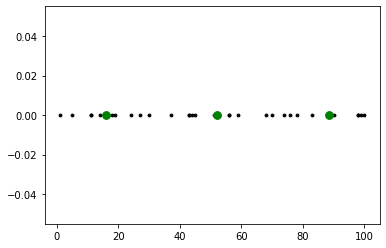

In [142]:
num_points = 30
minumum = 1
maximum = 100
k = 3
threshold = 0.0001
max_iterations = 100
points = create_clusters(num_points, minumum, maximum)
y_points = [0] * num_points
means = generate_random_means(k, minumum, maximum)
k_ypoints = [0] * k
# perform k-means clustering
iteration = 0
is_above_threshold = False
new_means = means
while iteration < max_iterations and is_above_threshold == False:
    means = new_means
    groups = k_means(points, means)
    new_means = re_group(groups)
    # check the percentage change between means
    # if the change between all means is within a certain
    # threshold, stop
    is_above_threshold = change_above_threshold(means, new_means, threshold)
    iteration += 1
print('number of iterations', iteration)
plt.scatter(points, y_points, color='k', s=8)
plt.scatter(new_means, k_ypoints, color='g', s=60)